# Tổng quan
1. Số lượng giao dịch
2. Khách hàng/ Tài khoản hoạt động nhiều nhất
3. Phân phối số lượng giao dịch
4. Giao dịch bất thường
5. Phân tích theo cửa hàng/ vị trí địa lý
6. Phân tích doanh thu
7. Phân khúc khách hàng
8. Phân tích dự báo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates
import random
from unidecode import unidecode

**Thêm 1 cột tên khách hàng được xử lý trên excel và chỉ mang tính tượng trưng, yêu cầu cung cấp thêm tên khách hàng và số tài khoản hoặc ID khách hàng**

In [4]:
df = pd.read_excel('data_client.xlsx', dtype={'Số tài khoản': str}, parse_dates=['Ngày giao dịch'])
df.head(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6412\1103185900.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_excel('data_client.xlsx', dtype={'Số tài khoản': str}, parse_dates=['Ngày giao dịch'])


,#,Mã giao dịch,Ngân hàng,Số tài khoản,Số tài khoản ảo,Tên dòng tiền,Số tiền,Ngày giao dịch,Nội dung chuyển khoản,Cơ sở/Cửa hàng,Tên khách hàng
0,1,FT243611S4BJ,OCB,0928882555,HNC20231124103547,Cửa hàng Thái Nguyên,2663000,2024-12-26 13:57:00,DUONG THANH HOAI chuyen tien,CUA HANG THAI NGUYEN,DUONG THANH HOAI
1,2,FT24361DYTN5,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,1253000,2024-12-26 13:36:00,QR - NGUYEN THI THUONG chuyen tien,CUA HANG THANH HOA,NGUYEN THI THUONG
2,3,FT24361YQBQ7,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,104000,2024-12-26 12:37:00,NGUYEN THI NGA chuyen tien FT24361405683136,CUA HANG THANH HOA,NGUYEN THI NGA
3,4,FT243611Z810,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,845000,2024-12-26 12:28:00,NGUYEN THI NGA chuyen tien hang FT24361743890824,CUA HANG THANH HOA,NGUYEN THI NGA
4,5,FT24361C467H,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,3069000,2024-12-26 12:23:00,OCB;HNC40322155931;TRINH THI PHUONG chuyen tien,CUA HANG THANH HOA,TRINH THI PHUONG
5,6,FT24361KQ5QG,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,678000,2024-12-26 12:23:00,NGUYEN THI HOA chuyen tien,CUA HANG THANH HOA,NGUYEN THI HOA
6,7,FT243613SFPG,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,805000,2024-12-26 12:17:00,MBVCB.8025853577.302563.NGUYEN THI LINH chuyen...,CUA HANG THANH HOA,NGUYEN THI LINH
7,8,FT243618498Z,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,1092000,2024-12-26 10:51:00,MAI THI HAI Chuyen tien,CUA HANG THANH HOA,MAI THI HAI
8,9,FT24361DQKY0,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,940000,2024-12-26 10:33:00,LE HA PHUONG chuyen tien,CUA HANG THANH HOA,LE HA PHUONG
9,10,FT24361THKXJ,OCB,0928882555,HNC20231124103246,Cửa hàng Hải Phòng,1504000,2024-12-26 10:32:00,HAN NGOC TRANG chuyen tien den PHUNG THI HANG ...,CUA HANG HAI PHONG,HAN NGOC TRANG


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   #                      2348 non-null   int64         
 1   Mã giao dịch           2348 non-null   object        
 2   Ngân hàng              2348 non-null   object        
 3   Số tài khoản           2348 non-null   object        
 4   Số tài khoản ảo        2348 non-null   object        
 5   Tên dòng tiền          2348 non-null   object        
 6   Số tiền                2348 non-null   int64         
 7   Ngày giao dịch         2348 non-null   datetime64[ns]
 8   Nội dung chuyển khoản  2348 non-null   object        
 9   Cơ sở/Cửa hàng         2348 non-null   object        
 10  Tên khách hàng         2276 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 201.9+ KB


**Một số nội dung chuyển khoản không có tên khách hàng nên bị trống => fill tên khách hàng fake**

In [7]:
last_names = ['NGUYEN', 'LE', 'TRAN', 'PHAM', 'MAI', 'NGO', 'DOAN', 'BUI']
mid_names = ['VAN', 'THANH', 'MINH', 'HUNG', 'TUAN', 'NGOC','THAO']
first_names = ['VUI', 'LAN', 'HA', 'TUYET', 'DUNG', 'TU', 'NAM', 'HAO']

# Hàm tạo tên ngẫu nhiên
def generate_random_name():
    last_name = random.choice(last_names)
    mid_name = random.choice(mid_names)
    first_name = random.choice(first_names)
    return f"{last_name} {mid_name} {first_name}"

# Điền giá trị vào các dòng trống bằng tên ngẫu nhiên
df['Tên khách hàng'] = df['Tên khách hàng'].apply(lambda x: generate_random_name() if pd.isna(x) or x == '' else x)

# Định dạng tên thành in hoa không dấu
df['Tên khách hàng'] = df['Tên khách hàng'].apply(lambda x: unidecode(x.upper()) if isinstance(x, str) else x)

# Kiểm tra kết quả
df.sample(20)

,#,Mã giao dịch,Ngân hàng,Số tài khoản,Số tài khoản ảo,Tên dòng tiền,Số tiền,Ngày giao dịch,Nội dung chuyển khoản,Cơ sở/Cửa hàng,Tên khách hàng
1866,1867,FT24292H16H9,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,697000,2024-10-18 10:39:00,TRAN THI HANG MY chuyen tien,CUA HANG THANH HOA,THI HANG MY
536,537,FT24338F9XQF,OCB,0928882555,HNC20231124103246,Cửa hàng Hải Phòng,596000,2024-12-03 17:34:00,MBVCB.7792975164.164648.DO NGOC ANH chuyen tie...,CUA HANG HAI PHONG,PHUNG THI HANG
661,662,FT24334R1PX1,OCB,0928882555,HNC20231124103246,Cửa hàng Hải Phòng,700000,2024-11-29 19:46:00,NGO NGOC MAI chuyen tien FT24334360009189,CUA HANG HAI PHONG,NGOC MAI CHUYEN
1980,1981,FT24288D07HD,OCB,0928882555,HNC20231124103547,Cửa hàng Thái Nguyên,199000,2024-10-14 19:49:00,QR - DUONG THI HUYEN TRANG Chuyen tien,CUA HANG THAI NGUYEN,THI HUYEN TRANG
47,48,FT2436080R7L,OCB,0928882555,HNC20231124103547,Cửa hàng Thái Nguyên,350000,2024-12-25 10:14:00,CAO THI HANG Chuyen tien,CUA HANG THAI NGUYEN,CAO THI HANG
431,432,FT243448M5KZ,OCB,0928882555,HNC20231124103246,Cửa hàng Hải Phòng,1099000,2024-12-08 19:00:00,OCB;HNC20231124103246;NGUYEN THI THUONG chuyen...,CUA HANG HAI PHONG,NGUYEN THI THUONG
664,665,FT24334M5FSL,OCB,0928882555,HNC41007092948,Cửa hàng Hải Dương,512000,2024-11-29 18:32:00,CUA HANG Hai Duong FT24334900701001,CUA HANG HAI DUONG,CUA HANG HAI
512,513,FT24340W66TY,OCB,0928882555,HNC41007092948,Cửa hàng Hải Dương,650000,2024-12-05 13:49:00,QR - CUA HANG Hai Duong,CUA HANG HAI DUONG,DOAN THANH TU
1697,1698,FT2429748RF2,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,1046000,2024-10-22 20:25:00,QR - PHAM QUYNH ANH chuyen tien,CUA HANG THANH HOA,PHAM QUYNH ANH
1461,1462,FT24305PJYK1,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,299000,2024-10-31 17:46:00,LE THI MAI Chuyen tien ao somi coc tay,CUA HANG THANH HOA,TIEN AO SOMI


## 1. Số lượng giao dịch

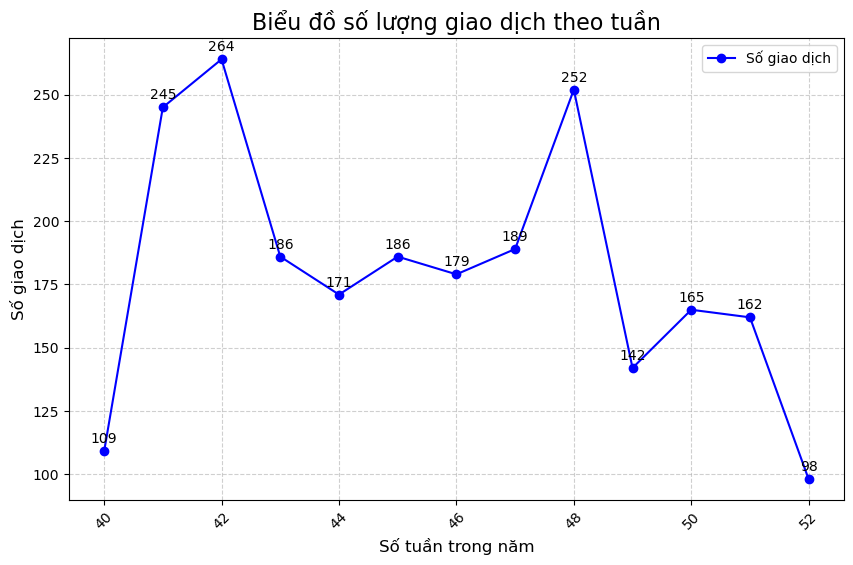

In [9]:
df_thang = (
    df.groupby([df['Ngày giao dịch'].dt.to_period('W'), df['Ngày giao dịch'].dt.isocalendar().week])
      .agg(
          tong_tien=('Số tiền', 'sum'),
          so_gd=('Mã giao dịch', 'count')
      )
      .reset_index()
)
df_thang.rename(columns= {
    'Ngày giao dịch':'Tuần',
    'week':'Số tuần trong năm',
    'tong_tien': 'Tổng tiền',
    'so_gd': 'Số giao dịch'
}, inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df_thang['Số tuần trong năm'], df_thang['Số giao dịch'], marker='o', linestyle='-', color='b', label='Số giao dịch')

for x, y in zip(df_thang['Số tuần trong năm'], df_thang['Số giao dịch']):
    plt.text(x, y + 2, f'{y}', fontsize=10, ha='center', va='bottom', color='black')
    
plt.title('Biểu đồ số lượng giao dịch theo tuần', fontsize=16)
plt.xlabel('Số tuần trong năm', fontsize=12)
plt.ylabel('Số giao dịch', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()

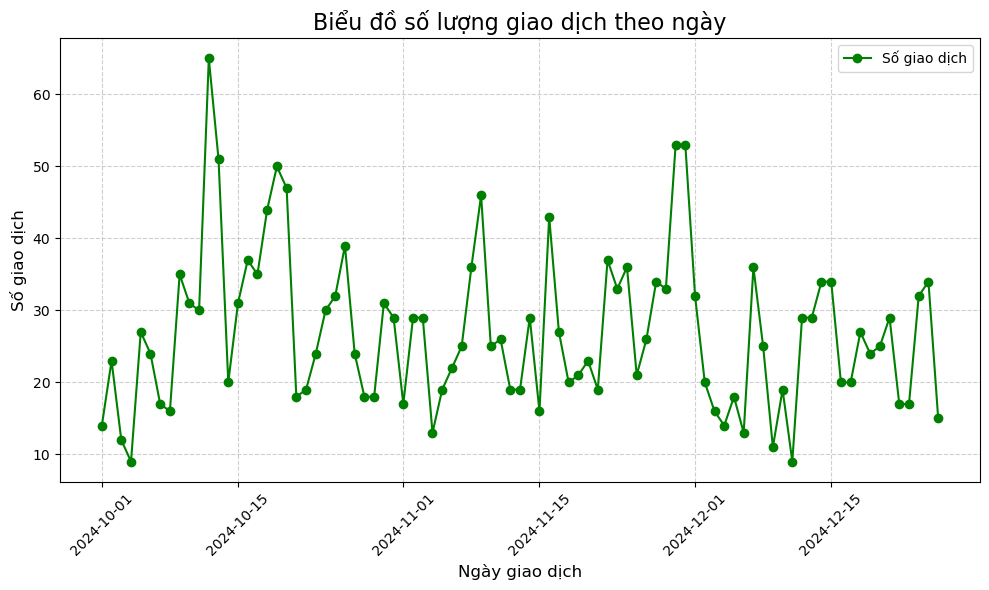

In [10]:
df_ngay = (
    df.groupby(df['Ngày giao dịch'].dt.to_period('D'))
      .agg(
          tong_tien=('Số tiền', 'sum'),
          so_gd=('Mã giao dịch', 'count')
      )
      .reset_index()
)
df_ngay.rename(columns= {
    'tong_tien': 'Tổng tiền',
    'so_gd': 'Số giao dịch'
}, inplace=True)
df_ngay['Ngày giao dịch'] = df_ngay['Ngày giao dịch'].dt.start_time


plt.figure(figsize=(10, 6))
plt.plot(df_ngay['Ngày giao dịch'], df_ngay['Số giao dịch'], marker='o', linestyle='-', color='g', label='Số giao dịch')
    
plt.title('Biểu đồ số lượng giao dịch theo ngày', fontsize=16)
plt.xlabel('Ngày giao dịch', fontsize=12)
plt.ylabel('Số giao dịch', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Tạo hàm random số tài khoản khách hàng
def generate_account_number():
    return random.randint(1000000000, 9999999999)

# Tạo từ điển ánh xạ tên khách hàng với số tài khoản
account_dict = {}

# Tạo số tài khoản cho khách hàng, nếu họ tên y hệt nhau thì cùng số tài khoản
def get_account_number(name):
    # Kiểm tra xem tên khách hàng đã có trong từ điển chưa
    if name not in account_dict:
        # Nếu chưa có, tạo số tài khoản mới
        account_dict[name] = generate_account_number()
    return account_dict[name]

# Tạo cột số tài khoản cho khách hàng
df['STK khách hàng'] = df['Tên khách hàng'].apply(get_account_number)
df.sample(10)

,#,Mã giao dịch,Ngân hàng,Số tài khoản,Số tài khoản ảo,Tên dòng tiền,Số tiền,Ngày giao dịch,Nội dung chuyển khoản,Cơ sở/Cửa hàng,Tên khách hàng,STK khách hàng
2055,2056,FT242867VV9T,OCB,0928882555,HNC20231124103246,Cửa hàng Hải Phòng,510000,2024-10-12 19:15:00,QR - mua vay CUA HANG,CUA HANG HAI PHONG,QR - MUA VAY,8770411800
665,666,FT24334R7ZV5,OCB,0928882555,HNC20231124103547,Cửa hàng Thái Nguyên,920000,2024-11-29 18:29:00,LUC THI NGA Chuyen tien,CUA HANG THAI NGUYEN,LUC THI NGA,1533636340
2124,2125,FT242851NV2M,OCB,0928882555,HNC20231124103246,Cửa hàng Hải Phòng,645000,2024-10-11 17:20:00,QR - NGUYEN THI HOANG LINH chuyen tien,CUA HANG HAI PHONG,THI HOANG LINH,4323746981
1265,1266,FT243138WTJ1,OCB,0928882555,HNC41007092948,Cửa hàng Hải Dương,1150000,2024-11-08 17:20:00,OCB;HNC41007092948;CUA HANG Hai Duong,CUA HANG HAI DUONG,HNC41007092948;CUA HANG,8382388399
1491,1492,FT24304TD3NZ,OCB,0928882555,HNC20231124103246,Cửa hàng Hải Phòng,629000,2024-10-30 18:23:00,NGUYEN THI THU TRANG chuyen tien mua vay,CUA HANG HAI PHONG,TRANG CHUYEN TIEN,6798789006
2224,2225,FT2428225MQZ,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,535000,2024-10-07 21:24:00,QR - HOANG THI LAN chuyen tien,CUA HANG THANH HOA,HOANG THI LAN,6805105535
1846,1847,FT24292QPH2L,OCB,0928882555,HNC20231124103246,Cửa hàng Hải Phòng,482000,2024-10-18 17:20:00,DANG THI BAC chuyen tien FT24292161947546,CUA HANG HAI PHONG,THI BAC CHUYEN,7517190729
208,209,FT24353H0QNC,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,1209000,2024-12-18 16:24:00,NGUYEN THI THU PHUONG Chuyen tien,CUA HANG THANH HOA,NGUYEN THI THU PHUONG,1664050686
377,378,FT243473GG04,OCB,0928882555,HNC20231124103547,Cửa hàng Thái Nguyên,185000,2024-12-12 12:46:00,QR - DOAN THI THUY LINH chuyen tien,CUA HANG THAI NGUYEN,DOAN THI THUY LINH,8109586585
1167,1168,FT24316101WW,OCB,0928882555,HNC20231124103246,Cửa hàng Hải Phòng,111000,2024-11-11 18:40:00,VU THU HANG chuyen tien,CUA HANG HAI PHONG,VU THU HANG,4347731617


In [12]:
df.sample(20)

,#,Mã giao dịch,Ngân hàng,Số tài khoản,Số tài khoản ảo,Tên dòng tiền,Số tiền,Ngày giao dịch,Nội dung chuyển khoản,Cơ sở/Cửa hàng,Tên khách hàng,STK khách hàng
1354,1355,FT24310M1T9G,OCB,0928882555,HNC20231124103246,Cửa hàng Hải Phòng,2623000,2024-11-05 14:56:00,DO PHUONG THAO chuyen tien den PHUNG THI HANG ...,CUA HANG HAI PHONG,DEN PHUNG THI,9080593349
1148,1149,FT243181BMM3,OCB,0928882555,HNC20231124103547,Cửa hàng Thái Nguyên,1919000,2024-11-12 20:27:00,OCB;HNC20231124103547;LE THI HIEN chuyen tien,CUA HANG THAI NGUYEN,LE THI HIEN,4425269212
176,177,FT243546DW92,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,1699000,2024-12-19 20:35:00,LE THI THUY chuyen tien,CUA HANG THANH HOA,LE THI THUY,5626612974
200,201,FT2435371YD0,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,969000,2024-12-18 20:12:00,MBVCB.7951137337.812671.TRAN THI THU TRANG chu...,CUA HANG THANH HOA,TRAN THI THU TRANG,7221046613
468,469,FT24342DYYLM,OCB,0928882555,HNC20231124103547,Cửa hàng Thái Nguyên,1960000,2024-12-07 15:37:00,KIEU THI YEN Chuyen tien,CUA HANG THAI NGUYEN,KIEU THI YEN,2946795755
2108,2109,FT24286SRKH8,OCB,0928882555,HNC20231124103547,Cửa hàng Thái Nguyên,560000,2024-10-12 08:49:00,QR - PHAM THI LAN HUONG chuyen tien,CUA HANG THAI NGUYEN,THI LAN HUONG,3326465429
973,974,FT24324PMDWV,OCB,0928882555,HNC20231124103547,Cửa hàng Thái Nguyên,350000,2024-11-19 18:29:00,QR - LE THI NGOC chuyen tien,CUA HANG THAI NGUYEN,LE THI NGOC,9056465666
708,709,FT24333FNPXZ,OCB,0928882555,HNC20231124103547,Cửa hàng Thái Nguyên,2150000,2024-11-28 19:03:00,DANG THI HUYEN TRANG chuyen tien,CUA HANG THAI NGUYEN,THI HUYEN TRANG,2313997478
1917,1918,FT24290JXK70,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,200000,2024-10-16 20:00:00,OCB;HNC40322155931;NGO VIET PHUONG chuyen tien,CUA HANG THANH HOA,NGO VIET PHUONG,5775102025
1200,1201,FT24316C5846,OCB,0928882555,HNC40322155931,Cửa hàng Thanh Hóa,1050000,2024-11-10 15:40:00,MBVCB.7566909198.992966.LE THI HUYEN chuyen ti...,CUA HANG THANH HOA,PHUNG THI HANG,1159075478


## 2. Khách hàng có số giao dịch nhiều nhất

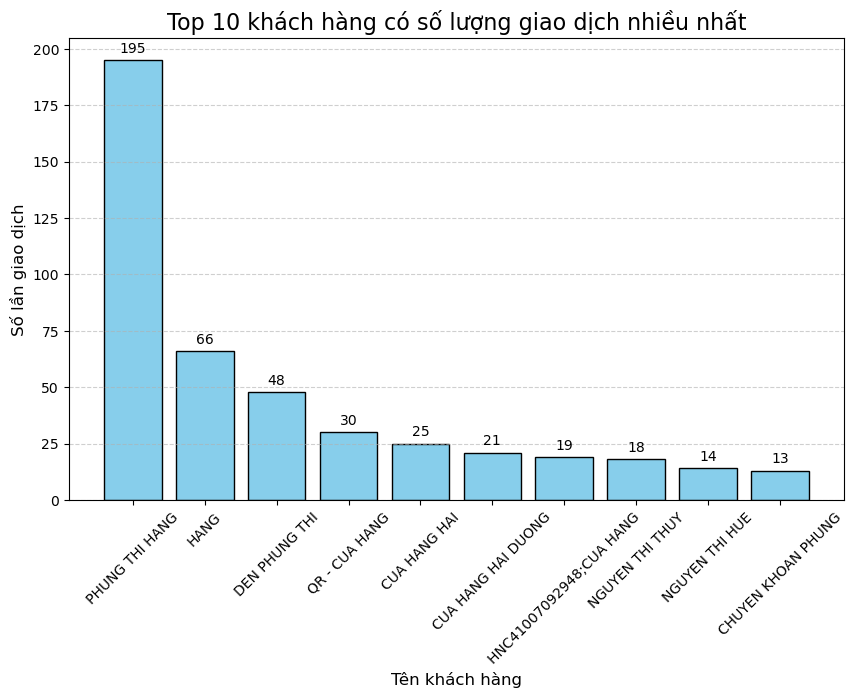

In [14]:
df_kh = (
    df.groupby(df['Tên khách hàng'])
      .agg(
          tong_tien=('Số tiền', 'sum'),
          so_gd=('STK khách hàng', 'count')
      )
      .reset_index()
)
df_kh.rename(columns= {
    'tong_tien': 'Tổng tiền',
    'so_gd': 'Số lần giao dịch'
}, inplace=True)

# Lấy top 10 khách hàng có số giao dịch nhiều nhất
top_10_kh = df_kh.sort_values(by='Số lần giao dịch', ascending=False).head(10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(top_10_kh['Tên khách hàng'], top_10_kh['Số lần giao dịch'], color='skyblue', edgecolor='black')
for x, y in zip(top_10_kh['Tên khách hàng'], top_10_kh['Số lần giao dịch']):
    plt.text(x, y + 2, f'{y}', fontsize=10, ha='center', va='bottom', color='black')

# Cài đặt tiêu đề và nhãn
plt.title('Top 10 khách hàng có số lượng giao dịch nhiều nhất', fontsize=16)
plt.xlabel('Tên khách hàng', fontsize=12)
plt.ylabel('Số lần giao dịch', fontsize=12)
plt.xticks(rotation=45)  # Xoay nhãn trục X để dễ nhìn hơn
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Hiển thị biểu đồ
plt.show()

## 3. Phân bổ số lượng giao dịch

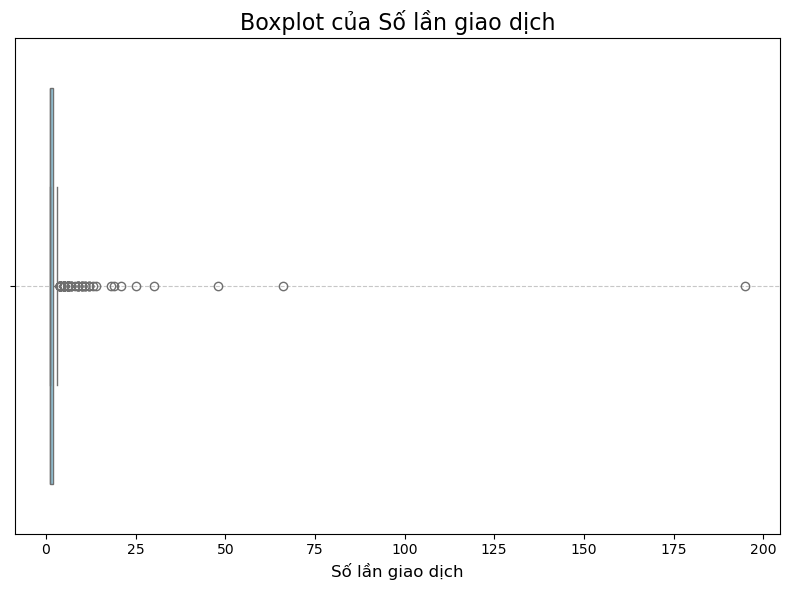

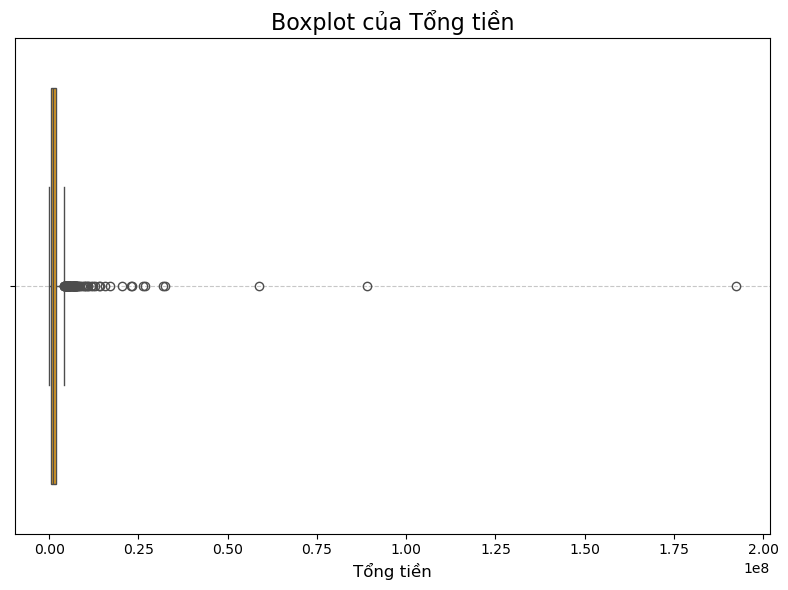

In [16]:
# Vẽ biểu đồ boxplot cho 'Số lần giao dịch'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_kh, x='Số lần giao dịch', color='skyblue')
plt.title('Boxplot của Số lần giao dịch', fontsize=16)
plt.xlabel('Số lần giao dịch', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ boxplot cho 'Tổng tiền'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_kh, x='Tổng tiền', color='orange')
plt.title('Boxplot của Tổng tiền', fontsize=16)
plt.xlabel('Tổng tiền', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

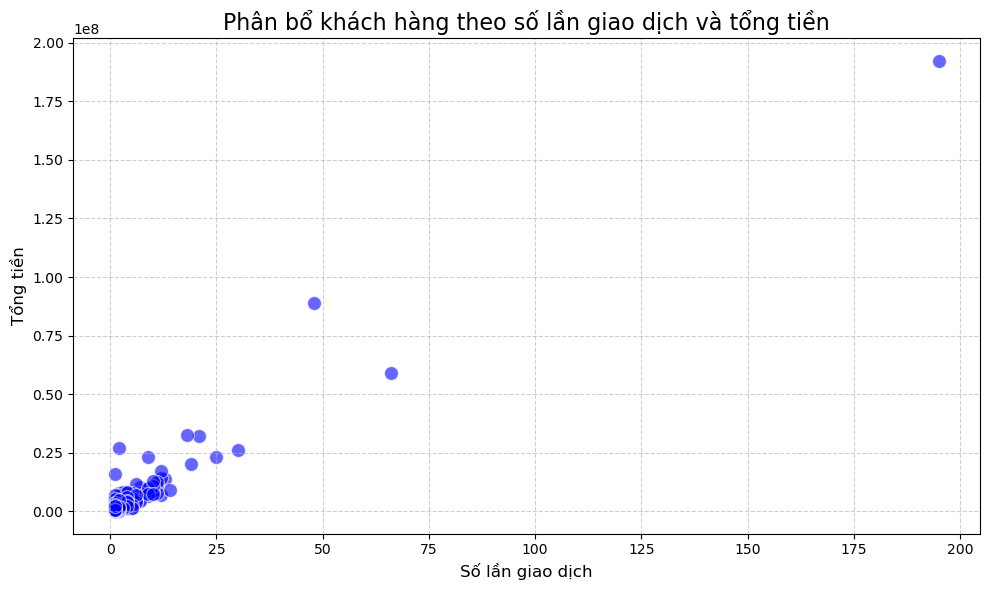

In [17]:
# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_kh, x='Số lần giao dịch', y='Tổng tiền', color='blue', s=100, alpha=0.6)

# Tiêu đề và nhãn
plt.title('Phân bổ khách hàng theo số lần giao dịch và tổng tiền', fontsize=16)
plt.xlabel('Số lần giao dịch', fontsize=12)
plt.ylabel('Tổng tiền', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

## 4. Giao dịch bất thường

In [19]:
# Xác định outliers dựa trên quy tắc IQR (Interquartile Range)
Q1_x = df_kh['Số lần giao dịch'].quantile(0.25)
Q3_x = df_kh['Số lần giao dịch'].quantile(0.75)
IQR_x = Q3_x - Q1_x

Q1_y = df_kh['Tổng tiền'].quantile(0.25)
Q3_y = df_kh['Tổng tiền'].quantile(0.75)
IQR_y = Q3_y - Q1_y

# Ngưỡng để xác định outlier
low_x, high_x = Q1_x - 1.5 * IQR_x, Q3_x + 1.5 * IQR_x
low_y, high_y = Q1_y - 1.5 * IQR_y, Q3_y + 1.5 * IQR_y

# Lọc outliers
outliers = df_kh[
    (df_kh['Số lần giao dịch'] < low_x) | (df_kh['Số lần giao dịch'] > high_x) |
    (df_kh['Tổng tiền'] < low_y) | (df_kh['Tổng tiền'] > high_y)
]

total_outliers = outliers.shape[0]
print(f"\nDanh sách các giao dịch bất thường (Tổng số outliers: {total_outliers}):")
display(outliers.style.set_table_styles(
    [{'selector': 'thead th', 
      'props': [('background-color', '#4CAF50'), 
                ('color', 'white'), 
                ('font-weight', 'bold')]},
     {'selector': 'tbody td', 
      'props': [('background-color', '#f9f9f9'), 
                ('border', '1px solid #ddd')]},
     {'selector': 'table', 
      'props': [('border-collapse', 'collapse'), 
                ('width', '100%')]},
     {'selector': 'tbody tr:hover', 
      'props': [('background-color', '#f1f1f1')]}]
    )
)


Danh sách các giao dịch bất thường (Tổng số outliers: 128):


,Tên khách hàng,Tổng tiền,Số lần giao dịch
25,BUI THI HANH,4466000,3
29,BUI THI HUONG,6123000,1
50,CAO THI HANG,4403000,2
61,CHUYEN KHOAN PHUNG,13915000,13
62,CHUYEN TIEN AO,4109000,5
64,CHUYEN TIEN MUA,7048000,5
69,CK,7578000,2
72,CUA HANG HAI,23288000,25
73,CUA HANG HAI DUONG,31919000,21
108,DEN PHUNG THI,88969000,48


## 5. Phân tích theo cửa hàng/ vị trí địa lý

C:\Users\Admin\AppData\Local\Temp\ipykernel_6412\77837956.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=so_gd.index, y=so_gd.values, palette="Blues_d")


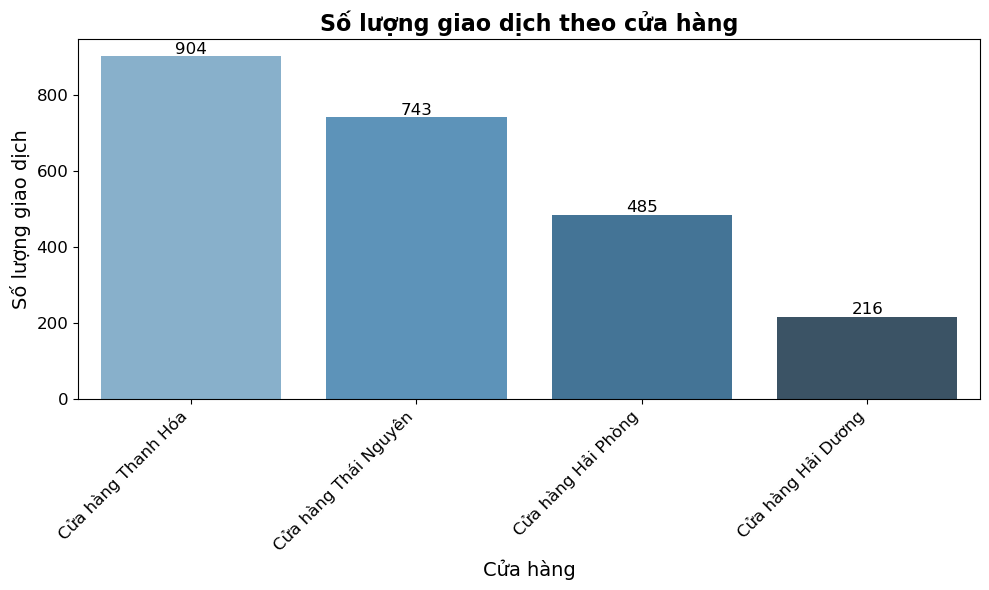

In [21]:
so_gd = df['Tên dòng tiền'].value_counts()

plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x=so_gd.index, y=so_gd.values, palette="Blues_d")

plt.title('Số lượng giao dịch theo cửa hàng', fontsize=16, fontweight='bold')
plt.xlabel('Cửa hàng', fontsize=14)
plt.ylabel('Số lượng giao dịch', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():,.0f}',  # Giá trị số liệu (số lượng giao dịch)
                 (p.get_x() + p.get_width() / 2., p.get_height()),  # Vị trí đặt số
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

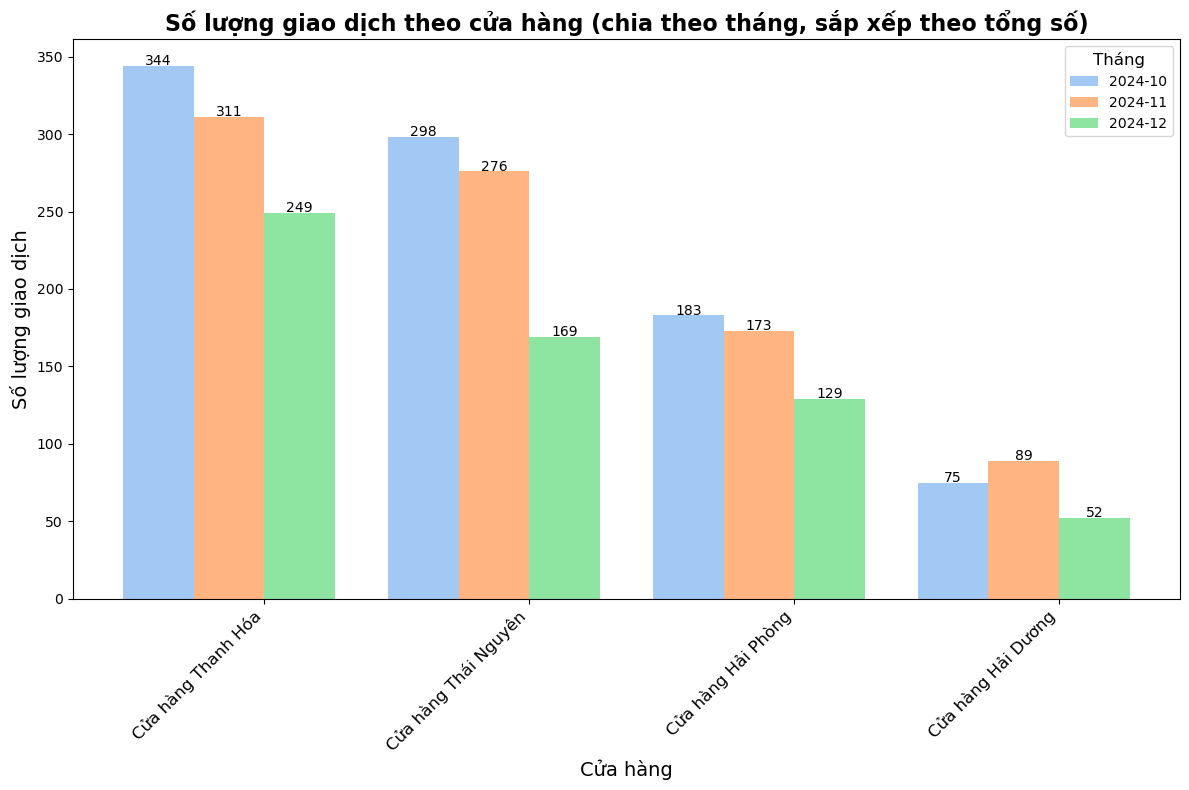

In [22]:
df['Tháng'] = df['Ngày giao dịch'].dt.to_period('M')

# Nhóm dữ liệu theo 'Tên dòng tiền' (cửa hàng) và 'Tháng', tính số lượng giao dịch
so_gd_theo_thang = df.groupby(['Tên dòng tiền', 'Tháng']).size().reset_index(name='Số lượng giao dịch')

# Pivot dữ liệu để tạo bảng với hàng là 'Tên dòng tiền' và cột là 'Tháng'
data_pivot = so_gd_theo_thang.pivot(index='Tên dòng tiền', columns='Tháng', values='Số lượng giao dịch').fillna(0)
# Tính tổng số giao dịch theo cửa hàng
data_pivot['Tổng số giao dịch'] = data_pivot.sum(axis=1)

# Sắp xếp dữ liệu theo tổng số giao dịch giảm dần
data_pivot = data_pivot.sort_values(by='Tổng số giao dịch', ascending=False).drop(columns='Tổng số giao dịch')

# Sử dụng bảng màu pastel
colors = sns.color_palette("pastel", n_colors=len(data_pivot.columns))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.8 / len(data_pivot.columns)  # Độ rộng cột
x = range(len(data_pivot.index))  # Vị trí trục x

for i, month in enumerate(data_pivot.columns):
    ax.bar(
        [p + i * bar_width for p in x],
        data_pivot[month],
        width=bar_width,
        label=str(month),
        color=colors[i]
    )
    # Thêm nhãn dữ liệu trên từng cột
    for j, value in enumerate(data_pivot[month]):
        if value > 0:  # Chỉ hiện nhãn nếu giá trị > 0
            ax.text(
                j + i * bar_width,
                value + 0.5,  # Vị trí nhãn trên cột
                f'{int(value)}',
                ha='center',
                fontsize=10
            )

# Tùy chỉnh trục x
ax.set_xticks([p + bar_width * (len(data_pivot.columns) / 2) for p in x])
ax.set_xticklabels(data_pivot.index, rotation=45, ha='right', fontsize=12)

# Tùy chỉnh biểu đồ
ax.set_title('Số lượng giao dịch theo cửa hàng (chia theo tháng, sắp xếp theo tổng số)', fontsize=16, fontweight='bold')
ax.set_xlabel('Cửa hàng', fontsize=14)
ax.set_ylabel('Số lượng giao dịch', fontsize=14)
ax.legend(title='Tháng', title_fontsize=12, fontsize=10)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

## 6. Phân tích doanh thu

C:\Users\Admin\AppData\Local\Temp\ipykernel_6412\638336781.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=tong_gd.index, y=tong_gd.values, palette="Blues_d")


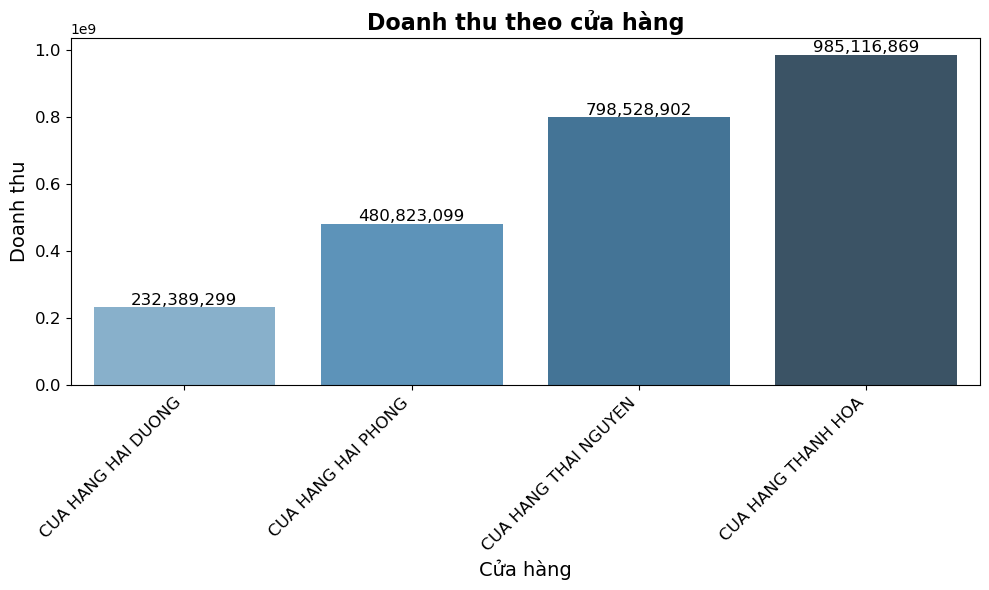

In [24]:
tong_gd = df.groupby('Cơ sở/Cửa hàng')['Số tiền'].sum()
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x=tong_gd.index, y=tong_gd.values, palette="Blues_d")

plt.title('Doanh thu theo cửa hàng', fontsize=16, fontweight='bold')
plt.xlabel('Cửa hàng', fontsize=14)
plt.ylabel('Doanh thu', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():,.0f}',  # Giá trị số liệu (số lượng giao dịch)
                 (p.get_x() + p.get_width() / 2., p.get_height()),  # Vị trí đặt số
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

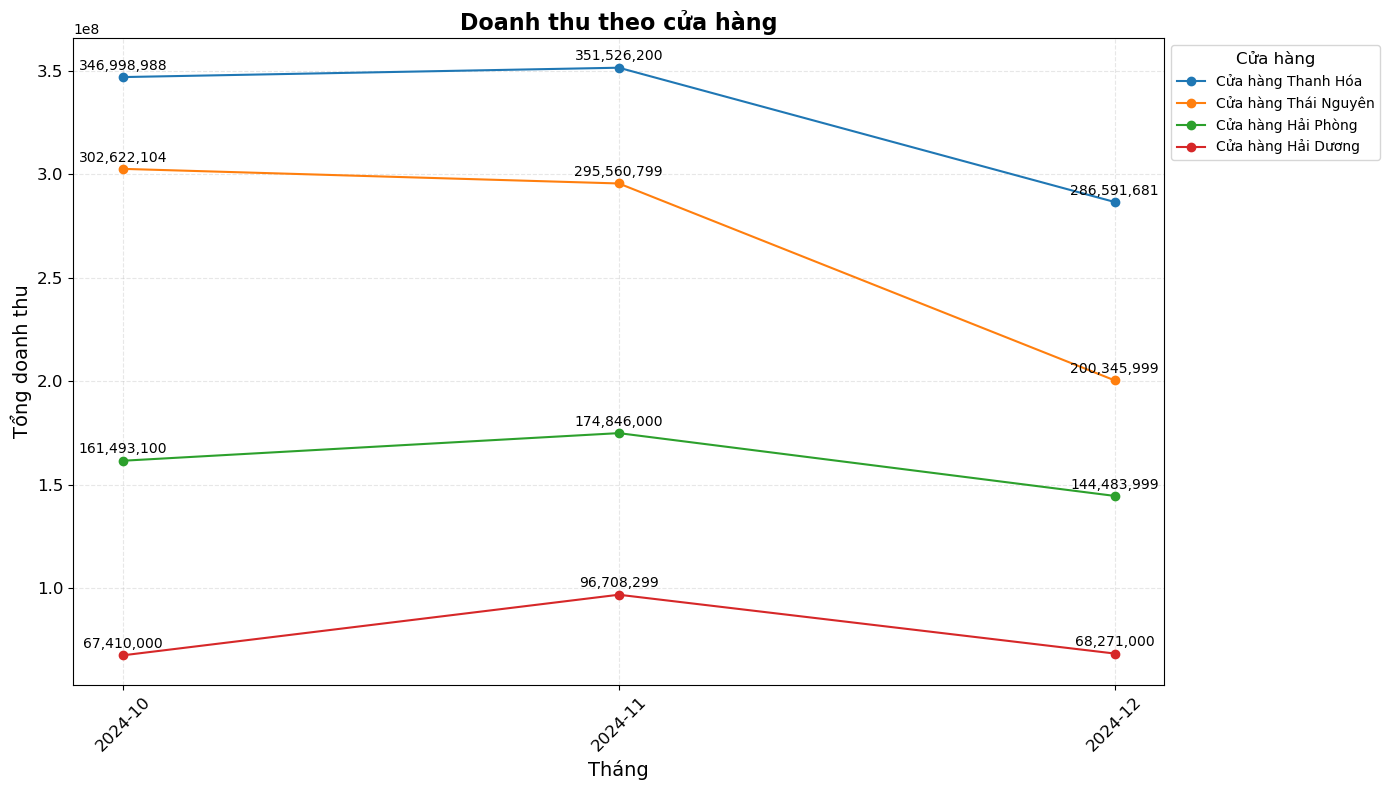

In [25]:
# Nhóm dữ liệu theo 'Tên dòng tiền' (cửa hàng) và 'Tháng', tính tổng số tiền
tong_tien_theo_thang = df.groupby(['Tên dòng tiền', 'Tháng'])['Số tiền'].sum().reset_index()

# Pivot dữ liệu để tạo bảng với hàng là 'Tên dòng tiền' và cột là 'Tháng'
data_pivot = tong_tien_theo_thang.pivot(index='Tên dòng tiền', columns='Tháng', values='Số tiền').fillna(0)

# Tính tổng số tiền theo cửa hàng
data_pivot['Tổng số tiền'] = data_pivot.sum(axis=1)

# Sắp xếp dữ liệu theo tổng số tiền giảm dần
data_pivot = data_pivot.sort_values(by='Tổng số tiền', ascending=False).drop(columns='Tổng số tiền')

# Vẽ biểu đồ đường line
plt.figure(figsize=(14, 8))
for store in data_pivot.index:
    plt.plot(
        data_pivot.columns.astype(str),  # Cột 'Tháng'
        data_pivot.loc[store],  # Dữ liệu của từng cửa hàng
        marker='o',  # Thêm dấu tròn tại mỗi điểm
        label=store  # Gắn nhãn cho từng đường
    )
    # Thêm nhãn dữ liệu tại từng điểm
    for x, y in zip(data_pivot.columns.astype(str), data_pivot.loc[store]):
        if y > 0:  # Chỉ hiển thị nếu giá trị > 0
            plt.text(
                x, y + max(data_pivot.max()) * 0.01,  # Điều chỉnh vị trí nhãn (cao hơn điểm một chút)
                f'{y:,.0f}',  # Định dạng số với dấu phân cách hàng nghìn
                fontsize=10, ha='center', color='black'
            )

# Tùy chỉnh biểu đồ
plt.title('Doanh thu theo cửa hàng', fontsize=16, fontweight='bold')
plt.xlabel('Tháng', fontsize=14)
plt.ylabel('Tổng doanh thu', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cửa hàng', title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

## 7. Phân khúc khách hàng

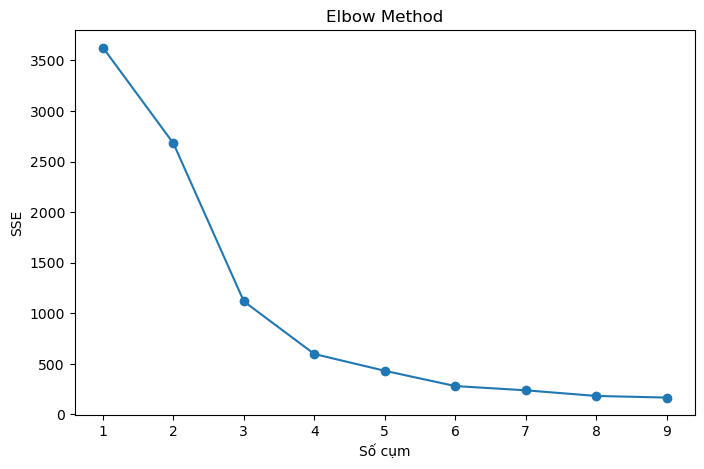

In [27]:
from datetime import datetime

now = datetime.now()
rfm = df.groupby('Tên khách hàng').agg(
    Recency=('Ngày giao dịch', lambda x: (now - x.max()).days),
    Frequency=('Ngày giao dịch', 'count'),
    Monetary=('Số tiền', 'sum')
).reset_index()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Tìm số cụm tối ưu bằng Elbow Method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Vẽ đồ thị Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Số cụm')
plt.ylabel('SSE')
plt.show()

In [28]:
# Áp dụng K-Means với số cụm tối ưu
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Chỉ giữ các cột số để tính toán trung bình
numeric_columns = ['Recency', 'Frequency', 'Monetary']
cluster_analysis = rfm.groupby('Cluster')[numeric_columns].mean()

# Hiển thị kết quả
print(cluster_analysis)

           Recency   Frequency      Monetary
Cluster                                     
0        83.601990    1.203980  1.144013e+06
1        36.939394    3.939394  4.633206e+06
2        31.000000  195.000000  1.923015e+08
3        47.147727    1.405303  1.441904e+06
4        32.000000   57.000000  7.389230e+07
5        29.800000   22.600000  2.686300e+07
6        27.535316    1.319703  1.399392e+06
7        35.347826    9.217391  1.164759e+07
8        65.515837    1.438914  1.415914e+06
9        98.031847    1.070064  9.478229e+05


In [29]:
rfm['Log_Frequency'] = np.log1p(rfm['Frequency'])
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])  # Recency (gần đây -> quan trọng hơn)

bins = [0, 1, 10, 100, 1000]  # Các mức độ cắt tùy chỉnh
labels = [1, 2, 3, 4]  # Đặt nhãn cho các nhóm

rfm['F_Score'] = pd.cut(rfm['Log_Frequency'], bins=bins, labels=labels)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])  # Monetary (chi tiêu ít -> kém hơn)

# Hiển thị kết quả
rfm

,Tên khách hàng,Recency,Frequency,Monetary,Cluster,Log_Frequency,R_Score,F_Score,M_Score
0,ANH CHUYEN TIEN,43,1,635000,3,0.693147,3,1,2
1,ANH NGOC CHUYEN,65,1,199000,8,0.693147,2,1,1
2,AO,99,1,2100000,9,0.693147,1,1,4
3,AO DA EP,76,1,1285000,0,0.693147,2,1,3
4,AU THI TRANG,79,2,1807000,0,1.098612,2,2,3
...,...,...,...,...,...,...,...,...,...
1204,XAM CHUYEN TIEN,75,2,1832000,0,1.098612,2,2,3
1205,XUAN DUONG CHUYEN,39,1,465000,3,0.693147,3,1,1
1206,XUYEN CHUYEN TIEN,95,1,681000,9,0.693147,1,1,2
1207,YEN CHUYEN KHOAN,87,1,369000,0,0.693147,1,1,1


In [30]:
# Tính RFM_Score bằng cách cộng các cột R_Score, F_Score và M_Score lại
rfm['RFM_Score'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)

# Hàm phân đoạn khách hàng dựa trên điểm R, F, M
def segment_customer(row):
    if row['R_Score'] == 4 and row['F_Score'] == 4:
        return 'Loyal Customers'
    elif row['R_Score'] == 1:
        return 'Lost Customers'
    elif row['M_Score'] == 4:
        return 'High-Spending Customers'
    elif row['F_Score'] == 1:
        return 'At-Risk Customers'
    else:
        return 'Other'

# Áp dụng hàm phân loại khách hàng vào cột 'Segment'
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Chỉ chọn các cột số (loại bỏ cột phân loại 'Segment')
numerical_columns = ['Recency', 'Frequency', 'Monetary', 'RFM_Score']

# Tính toán trung bình cho các cột số, nhóm theo 'Segment'
segmentation_analysis = rfm[numerical_columns + ['Segment']].groupby('Segment').mean()

# Hiển thị kết quả phân tích
print(segmentation_analysis)

                           Recency  Frequency      Monetary  RFM_Score
Segment                                                               
At-Risk Customers        47.795247   1.000000  9.033218e+05   5.954296
High-Spending Customers  42.870370   4.629630  5.722767e+06   8.907407
Lost Customers           92.338870   1.132890  1.127709e+06   4.146179
Other                    49.560440   2.307692  1.298393e+06   7.362637


Phân loại khách hàng:
* Loyal Customers: Điểm cao cả F và M.
* At-Risk Customers: Điểm R cao (ít quay lại), nhưng F và M thấp.
* High-Spending Customers: Điểm M cao.
* Lost Customers: Điểm R cao, F và M thấp.

## 8. Phân tích dự đoán

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Giả sử bạn muốn dự đoán số tiền giao dịch (Monetary) dựa trên các yếu tố như Recency và Frequency
X = rfm[['Recency', 'Frequency']]  # Các yếu tố độc lập
y = rfm['Monetary']  # Biến phụ thuộc (Số tiền giao dịch)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình (ví dụ: tính MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = model.score(X_test, y_test)
print(f'R2 Score: {r2}')
a = model.coef_[0]
b = model.intercept_

print(f'Hệ số góc (a): {a}')
print(f'Hệ số chặn (b): {b}')

Mean Squared Error: 1344453347958.3552
R2 Score: 0.7645411865570826
Hệ số góc (a): -4756.576228829581
Hệ số chặn (b): 368269.5185730539


In [38]:
# Dữ liệu mới mà bạn muốn dự báo
new_data = pd.DataFrame({
    'Recency': [10, 20, 30], # Số ngày kể từ lần giao dịch cuối của các khách hàng mới
    'Frequency': [5, 10, 15]     # Số lần giao dịch của các khách hàng mới
})

# Dự báo số tiền giao dịch cho các khách hàng mới
predictions = model.predict(new_data)

# Tạo bảng kết quả dự báo
new_data['Predicted_Monetary'] = predictions
new_data

,Recency,Frequency,Predicted_Monetary
0,10,5,5.429304e+06
1,20,10,1.049034e+07
2,30,15,1.555137e+07
